# K-means Clustering
Introduction
Math define
Example
Discussion

## Introduction

- Unsuppervised
- Unlabeled data

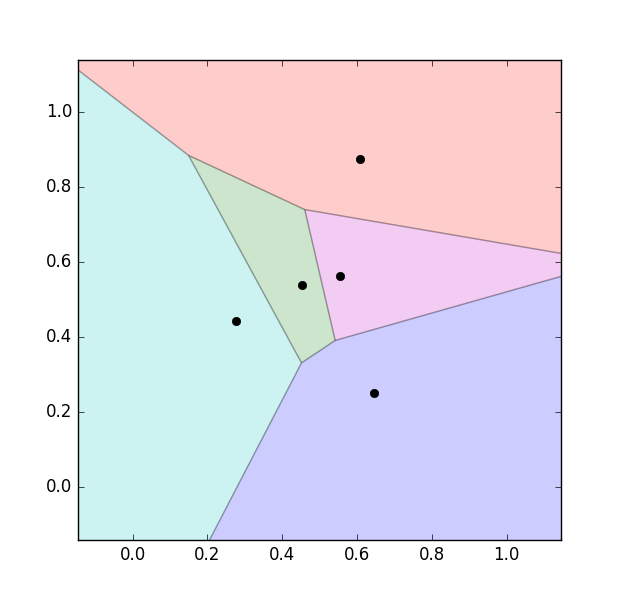

The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:
1. The centroids of the K clusters, which can be used to label new data
2. Labels for the training data (each data point is assigned to a single cluster)

## Mathematics

- N data points need to asign to K groups (K<N). **X**=[$\mathbf(x_1,x_2,…,x_N)$]∈$R^{dxN}$
- Need to find out the centers $\mathbf(m_1,m_2,…,m_K)∈R{d×1}$ and lable of each data point

*Notes:* **X, M, Y**: Matrix (upper case, bold); vectors (lower case, bold): $\mathbf{m, x_1}$; scala number (normal font):$x_1, N, y, k$

 For each $\mathbf x_i$, $\mathbf{y}_i = [y_{i1}, y_{i1}, \dots, y_{iK}]$, $\mathbf{x}_i$∈ cluster k => $\mathbf{y}_{ik}$=1 & $y_{ij} = 0, \forall j \neq k$

$y_{ik} \in \{0, 1\},~~~ \sum_{k = 1}^K y_{ik} = 1 ~~~ (1)$

## Lost Function

$x_i ∈ m_k$ center, $x_i ∈ k$ cluster => error =$(\mathbf{x}_i - \mathbf{m}_k)$

Find min error = min $\|\mathbf{x}_i - \mathbf{m}_k\|_2^2$

$y_{ik} = 1, y_{ij} = 0, ~\forall j \neq k$

<center>$\|\mathbf{x}_i - \mathbf{m}_k\|_2^2$ <=> $y_{ik}\|\mathbf{x}_i - \mathbf{m}_k\|_2^2 =  \sum_{j=1}^K y_{ij}\|\mathbf{x}_i - \mathbf{m}_j\|_2^2$</center>

Total error for all data:

<center>$\mathcal{L}(\mathbf{Y}, \mathbf{M}) = \sum_{i=1}^N\sum_{j=1}^K y_{ij} \|\mathbf{x}_i - \mathbf{m}_j\|_2^2$</center>

$\mathbf{Y} = [\mathbf{y}_1; \mathbf{y}_2; \dots; \mathbf{y}_N]$: Label vector matrix; $\mathbf{M} = [\mathbf{m}_1, \mathbf{m}_2, \dots \mathbf{m}_K]$: center vector matrix

The final result is optimizing this function:

<center>$\mathbf{Y}, \mathbf{M} = \arg\min_{\mathbf{Y}, \mathbf{M}} \sum_{i=1}^N\sum_{j=1}^K y_{ij} \|\mathbf{x}_i - \mathbf{m}_j\|_2^2~~~~~(2)$</center>

$\text{subject to:} ~~ y_{ij} \in \{0, 1\}~~ \forall i, j;~~~ \sum_{j = 1}^K y_{ij} = 1~~\forall i$

*\arg\min is the argument value so the function get the min value. For example, $f(x) = x^2 -2x + 1 = (x-1)^2, \arg\min_{i} x_i = 1, \min_{x} f(x) = 0$*

### Algorithm to optimize Lost Function

To solve (2), Solve M & Y when another variables is fixed by loop

* Fix $\mathbf M$, Find $\mathbf Y$

Assume have Center M, need to find out label vector to make (2) have minimum value.

$\Leftrightarrow$ Find Label vector for $\mathbf x_i$:

<center>$\mathbf{y}_i = \arg\min_{\mathbf{y}_i} \sum_{j=1}^K y_{ij}\|\mathbf{x}_i - \mathbf{m}_j\|_2^2 ~~~ (3)$</center>

$\text{subject to:} ~~ y_{ij} \in \{0, 1\}~~ \forall j;~~~ \sum_{j = 1}^K y_{ij} = 1$

only one $\mathbf y_i$=1,

(3) $\Leftrightarrow$ $j = \arg\min_{j} \|\mathbf{x}_i - \mathbf{m}_j\|_2^2$

$\|\mathbf{x}_i - \mathbf{m}_j\|_2^2$ is mean square distance from $\mathbf{x}_i$ to center $\mathbf{m}_i$ => $\mathbf{x}_i$ ∈ cluster with nearest center

$\Rightarrow$ Label vector of each point

* Fix $\mathbf Y$, Find $\mathbf M$

Assume have cluser for each point, need to find out new center for each cluster to make (2) have minimum value.

$\Leftrightarrow$ Find new Center for each cluster

<center>$\qquad \mathbf{m}_j = \arg\min_{\mathbf{m}_j} \sum_{i = 1}^{N} y_{ij}\|\mathbf{x}_i - \mathbf{m}_j \|_2^2.$</center>

Find roots by solve the derive =0. It is convex function by $\mathbf{m}_i$ so we can find min and optimize value

Set $l(\mathbf{m}_j)$ is the function inside $\arg\min$, get derive:

<center>$\qquad \frac{\partial l(\mathbf{m}_j)}{\partial \mathbf{m}_j} = 2\sum_{i=1}^N y_{ij}(\mathbf{m}_j - \mathbf{x}_i)$</center>

Solve the problem of derive=0:

<center>$\mathbf{m}_j \sum_{i=1}^N y_{ij} = \sum_{i=1}^N y_{ij} \mathbf{x}_i$</center>

<center>$\Rightarrow \mathbf{m}_j = \frac{ \sum_{i=1}^N y_{ij} \mathbf{x}_i}{\sum_{i=1}^N y_{ij}}$</center>

$\Rightarrow \mathbf{m}_j$ is average of cluster $\mathbf{j}$.

## Summary of Algorithm

* Input: Data $\mathbf{X}$ and number of cluster $\mathbf{K}$

* Output: Center $\mathbf{X}$ and Label for each data $\mathbf{Y}$

$\qquad$ 1. Select $\mathbf{K}$ point for the begining of center
<br>$\qquad$ 2. Assign each point to cluster which have nearest Center.
<br>$\qquad$ 3. If there is no change in step 2 for each cluster, stop algorithm
<br>$\qquad$ 4. Update center for each cluster by the AVG of all data point assigned to cluster in step 2.
<br>$\qquad$ 5. Loop step 2

## Business Case

<ui> Behavioral segmentation:
<li>Segment by purchase history
<li>Segment by activities on application, website, or platform
<li>Define personas based on interests
<li>Create profiles based on activity monitoring
<ui> Inventory categorization:
<li>Group inventory by sales activity
<li>Group inventory by manufacturing metrics
<ui>Sorting sensor measurements:
<li>Detect activity types in motion sensors
<li>Group images
<li>Separate audio
<li>Identify groups in health monitoring
<ui>Detecting bots or anomalies:
<li>Separate valid activity groups from bots
<li>Group valid activity to clean up outlier detection

## Demo

In [1]:
import mpld3
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
mpld3.enable_notebook()
np.random.seed(11)

Create data by data point assign center (2,2), (8,3) and (3,6). Each cluster have 500 data point.

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

* Show data on graph:

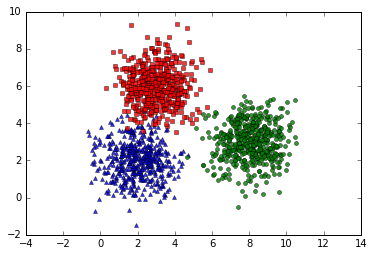

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

## Functions fo K-Means Clustering

$\qquad$ 1. kmeans_init_centers: initialize first centers
<br>$\qquad$ 2. kmeans_asign_labels: assign new label to the points of the centers.
<br>$\qquad$ 3. kmeans_update_centers: update new centers for the new label.
<br>$\qquad$ 4. has_converged: check algorithm to stop.

In [4]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

* Main function

In [5]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[ 2.99084705  6.04196062]
 [ 1.97563391  2.01568065]
 [ 8.03643517  3.02468432]]


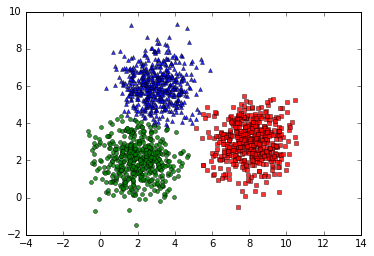

In [6]:
(centers, labels, it) = kmeans(X, K)
print ('Centers found by our algorithm:')
print (centers[-1])

kmeans_display(X, labels[-1])

## Compare with scikit-learn

Centers found by scikit-learn:
[[ 8.0410628   3.02094748]
 [ 2.99357611  6.03605255]
 [ 1.97634981  2.01123694]]


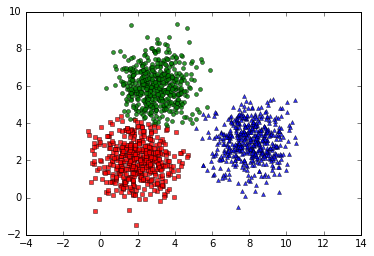

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print ('Centers found by scikit-learn:')
print (kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)